## Основы предобработки данных

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

import seaborn as sns

from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

np.set_printoptions(precision=3)
pd.set_option('precision', 3)

sns.set()

In [3]:
# pip install seaborn

### Загрузка данных и предварительный анализа

Dibetes dataset https://www.kaggle.com/uciml/pima-indians-diabetes-database 

In [6]:
diabetes_df = pd.read_csv('credit_3530203_70101.csv', index_col=None)
diabetes_df

,Unnamed: 0,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
0,1,0<=X<200,18.0,existing paid,radio/tv,1301.0,<100,>=7,4.0,guarantor,real estate,32.0,none,own,1.0,unskilled resident,1.0,yes,good
1,2,>=200,6.0,critical/other existing credit,new car,1323.0,100<=X<500,>=7,2.0,none,car,28.0,none,own,2.0,skilled,2.0,yes,good
2,3,<0,24.0,existing paid,new car,3123.0,<100,<1,4.0,none,life insurance,27.0,none,own,1.0,skilled,1.0,yes,bad
3,4,<0,36.0,existing paid,used car,5493.0,<100,>=7,2.0,none,no known property,42.0,none,for free,1.0,skilled,2.0,yes,good
4,5,>=200,9.0,existing paid,radio/tv,1126.0,100<=X<500,>=7,2.0,none,real estate,49.0,none,own,1.0,skilled,1.0,yes,good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
497,498,no checking,12.0,existing paid,furniture/equipment,1736.0,<100,4<=X<7,3.0,none,real estate,31.0,none,own,1.0,unskilled resident,1.0,yes,good
498,499,<0,30.0,existing paid,used car,3857.0,<100,1<=X<4,4.0,none,life insurance,40.0,none,own,1.0,high qualif/self emp/mgmt,1.0,yes,good
499,500,no checking,12.0,existing paid,radio/tv,804.0,<100,>=7,4.0,none,car,38.0,none,own,1.0,skilled,1.0,yes,good
500,501,<0,45.0,existing paid,radio/tv,1845.0,<100,1<=X<4,4.0,none,no known property,23.0,none,for free,1.0,skilled,1.0,yes,bad


In [7]:
diabetes_df.shape

(502, 19)

In [8]:
diabetes_df.head()

,Unnamed: 0,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,other_parties,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,foreign_worker,class
0,1,0<=X<200,18.0,existing paid,radio/tv,1301.0,<100,>=7,4.0,guarantor,real estate,32.0,none,own,1.0,unskilled resident,1.0,yes,good
1,2,>=200,6.0,critical/other existing credit,new car,1323.0,100<=X<500,>=7,2.0,none,car,28.0,none,own,2.0,skilled,2.0,yes,good
2,3,<0,24.0,existing paid,new car,3123.0,<100,<1,4.0,none,life insurance,27.0,none,own,1.0,skilled,1.0,yes,bad
3,4,<0,36.0,existing paid,used car,5493.0,<100,>=7,2.0,none,no known property,42.0,none,for free,1.0,skilled,2.0,yes,good
4,5,>=200,9.0,existing paid,radio/tv,1126.0,100<=X<500,>=7,2.0,none,real estate,49.0,none,own,1.0,skilled,1.0,yes,good


In [9]:
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 502 entries, 0 to 501
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Unnamed: 0              502 non-null    int64  
 1   checking_status         502 non-null    object 
 2   duration                502 non-null    float64
 3   credit_history          502 non-null    object 
 4   purpose                 502 non-null    object 
 5   credit_amount           502 non-null    float64
 6   savings_status          502 non-null    object 
 7   employment              502 non-null    object 
 8   installment_commitment  502 non-null    float64
 9   other_parties           502 non-null    object 
 10  property_magnitude      502 non-null    object 
 11  age                     502 non-null    float64
 12  other_payment_plans     502 non-null    object 
 13  housing                 502 non-null    object 
 14  existing_credits        502 non-null    fl

### Изучение и обработка количественных признаков

In [10]:
diabetes_df.describe()

,Unnamed: 0,duration,credit_amount,installment_commitment,age,existing_credits,num_dependents
count,502.000,502.000,502.000,502.000,502.000,502.000,502.000
mean,251.500,20.426,3296.341,2.998,35.542,1.420,1.167
std,145.059,12.748,2822.553,1.106,11.274,0.586,0.374
min,1.000,-1.000,250.000,1.000,19.000,1.000,1.000
25%,126.250,12.000,1376.250,2.000,27.000,1.000,1.000
50%,251.500,18.000,2356.000,3.000,33.000,1.000,1.000
75%,376.750,24.000,3975.250,4.000,42.000,2.000,1.000
max,502.000,72.000,18424.000,4.000,75.000,4.000,2.000


In [11]:
diabetes_df.var()

Unnamed: 0                2.104e+04
duration                  1.625e+02
credit_amount             7.967e+06
installment_commitment    1.224e+00
age                       1.271e+02
existing_credits          3.439e-01
num_dependents            1.396e-01
dtype: float64

In [12]:
diabetes_df[['Age','Glucose']].hist(figsize=(10, 4))

KeyError: "None of [Index(['Age', 'Glucose'], dtype='object')] are in the [columns]"

In [13]:
diabetes_df[['Age','Glucose']].plot(kind='density', layout=(1, 2), subplots=True,
                                   figsize=(10, 4), sharex=False)

KeyError: "None of [Index(['Age', 'Glucose'], dtype='object')] are in the [columns]"

In [14]:
sns.distplot(diabetes_df['Age'])

KeyError: 'Age'

#### Обработка выбросов

In [15]:
sns.boxplot(x='Insulin', data=diabetes_df)

ValueError: Could not interpret input 'Insulin'

<AxesSubplot:>

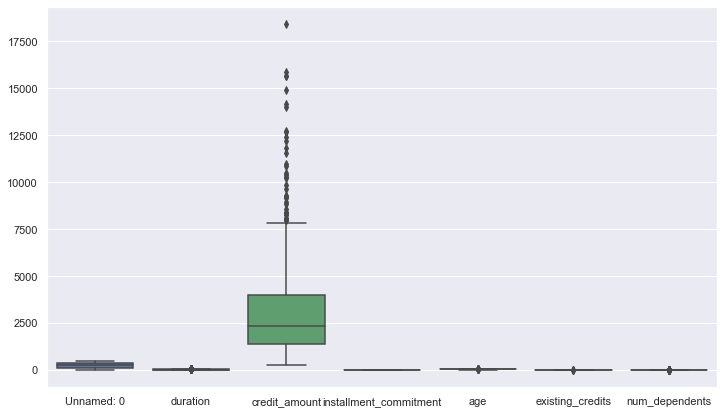

In [16]:
fig, axs = plt.subplots(figsize=(12,7))
sns.boxplot(data=diabetes_df)

In [17]:
diabetes_df['Insulin'] = diabetes_df.Insulin.clip(lower=diabetes_df.Insulin.quantile(0.05), 
                                                  upper=diabetes_df.Insulin.quantile(0.95))

AttributeError: 'DataFrame' object has no attribute 'Insulin'

<AxesSubplot:>

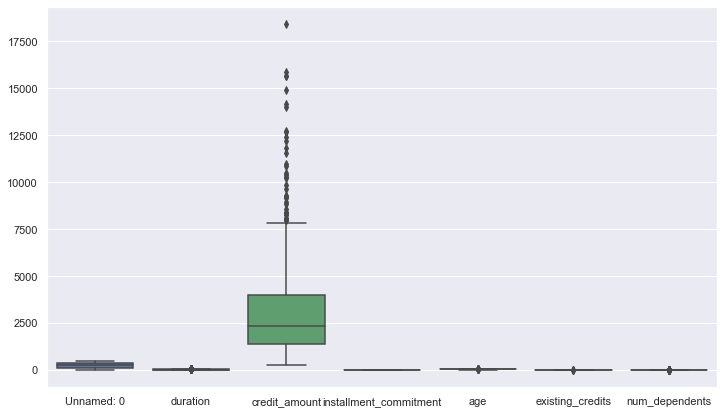

In [18]:
plt.subplots(figsize=(12,7))
sns.boxplot(data=diabetes_df)

### Обработка пропущенных значений

#### Поиск пропусков

In [ ]:
no_zero_columns = list (set(diabetes_df.columns) -  set(['Outcome','Pregnancies']))

In [ ]:
(diabetes_df[no_zero_columns] == 0).sum()

In [ ]:
diabetes_df.loc[:, no_zero_columns] = diabetes_df[no_zero_columns].replace(0, np.NaN)
diabetes_df.head()

In [ ]:
diabetes_df.isnull().sum()

#### Работа с пропусками

In [ ]:
# "Плохие" способы:

    # Удаляем строки
print (diabetes_df.dropna(how='any', axis=0).shape)

    # Удаляем столбцы
print (diabetes_df.dropna(how='any', axis=1).shape)

In [ ]:
# Заполняем произвольным значением

diabetes_df.fillna(-1).head()

In [ ]:
diabetes_df.isnull().mean()

In [ ]:
# Удалить столбцы, в которых много пропущенных значение
diabetes_df.loc[:, diabetes_df.isnull().mean() < .25].shape

In [ ]:
diabetes_df.fillna(diabetes_df.mean(), inplace=True)

# diabetes_df['Glucose'].fillna((diabetes['Glucose']).mode()[0], inplace=True)
# diabetes_df['BMI'].fillna((diabetes['BMI']).mean(), inplace=True)
# diabetes_df['Insulin'].fillna((diabetes['Insulin']).median(), inplace=True)

diabetes_df.isnull().sum()

### Дискретизация данных (binning)

In [ ]:
# Equal-width partitioning

diabetes_df['Age_equal'] = pd.cut(diabetes_df['Age'], 5)
diabetes_df.head()

In [ ]:
#Expert partitioning

bins = [0,12,19,35,60,100]
group_names = ['Child', 'Teenager', 'Young', 'Adult','Elderly']
diabetes_df['Age_expert'] = pd.cut(diabetes_df['Age'], bins, labels=group_names)
diabetes_df.head(5)

### Изучение категориальных и бинарных признаков

In [ ]:
diabetes_df['Outcome'].value_counts()

In [ ]:
diabetes_df['Age_equal'].value_counts()

In [ ]:
diabetes_df['Age_expert'].value_counts()

In [ ]:
diabetes_df['Outcome'].hist(figsize=(10, 4))

In [ ]:
diabetes_df['Outcome'].value_counts().plot(kind='bar')

In [ ]:
sns.countplot(x='Outcome', data=diabetes_df)

In [ ]:
_, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 5))

sns.countplot(x='Age_expert', data=diabetes_df, ax=axes[0]);
sns.countplot(x='Age_equal', data=diabetes_df, ax=axes[1]);

### Изчение взаимодействия признаков

#### Только количественные признаки

In [ ]:
plt.scatter(diabetes_df['Glucose'], diabetes_df['Insulin'], color='red')
plt.title('Glucose and Insulin')
plt.xlabel('Glucose')
plt.ylabel('Insulin')

In [ ]:
sns.jointplot(x='Glucose', y='Insulin', data=diabetes_df, kind='scatter', color='orange')


In [ ]:
num_columns = list(set(diabetes_df.columns) -  set(['Outcome','Age_expert','Age_equal']))
sns.pairplot(diabetes_df[num_columns])

In [ ]:
corr_matrix = diabetes_df[num_columns].corr()
corr_matrix

In [ ]:
sns.heatmap(corr_matrix, annot=True, annot_kws={"size":12})

#### Количественные и качественные признаки

In [ ]:
diabetes_df.pivot_table(['Glucose', 'Insulin'],['Outcome'], aggfunc='mean')

In [ ]:
sns.boxplot(x='Outcome', y='Glucose', data=diabetes_df)

In [ ]:
sns.lmplot('Glucose', 'Insulin', data=diabetes_df, hue='Outcome', fit_reg=False);

#### Только качественные признаки

In [ ]:
pd.crosstab(diabetes_df['Age_equal'], diabetes_df['Outcome'], margins=True)

In [ ]:
sns.countplot(x='Age_equal', hue='Outcome', data=diabetes_df)

### Нормализация данных

In [ ]:
diabetes_df[['DiabetesPedigreeFunction','Insulin']].plot(kind='density', layout=(1, 2), sharex=False, figsize=(10, 4))

In [ ]:
sns.boxplot(data=diabetes_df[['DiabetesPedigreeFunction', 'Insulin']])

In [ ]:
std_scaler = StandardScaler().fit(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

cols_std_scaled = std_scaler.transform(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

minmax_scaler = MinMaxScaler().fit(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

cols_minmax_scaled = minmax_scaler.transform(diabetes_df[['DiabetesPedigreeFunction','Insulin']])

type(cols_std_scaled)

In [ ]:
print('Mean after standardization:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_std_scaled[:,0].mean(), cols_std_scaled[:,1].mean()))
print('\nStandard deviation after standardization:\nGlucose={:.2f}, Insulin={:.2f}\n'
      .format(cols_std_scaled[:,0].std(), cols_std_scaled[:,1].std()))

print('Mean after min-max scaling:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_minmax_scaled[:,0].mean(), cols_minmax_scaled[:,1].mean()))
print('\nStandard deviation after min-max scaling:\nDiabetesPedigreeFunction={:.2f}, Insulin={:.2f}'
      .format(cols_minmax_scaled[:,0].std(), cols_minmax_scaled[:,1].std()))

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(diabetes_df['DiabetesPedigreeFunction'], diabetes_df['Insulin'], color='orange', label='input scale', alpha=0.5)  
#plt.scatter(cols_std_scaled[:,0], cols_std_scaled[:,1], color='red', label='Standardized [N  (m=0, ; d=1)]', alpha=0.3)
#plt.scatter(cols_minmax_scaled[:,0], cols_minmax_scaled[:,1],color='blue', label='Min-max scaling [min=0, max=1]', alpha=0.3)
plt.xlabel('Glucose')
plt.ylabel('Insulin')
plt.legend(loc='upper left')


In [ ]:
diabetes_df_scaled = pd.DataFrame(cols_std_scaled, columns = ['DiabetesPedigreeFunction', 'Insulin'])

diabetes_df_scaled[['DiabetesPedigreeFunction','Insulin']].plot(kind='density', layout=(1, 2), sharex=False, figsize=(10, 4))

In [ ]:
sns.boxplot(data=diabetes_df_scaled[['DiabetesPedigreeFunction', 'Insulin']])